In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
#读取基本包
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

#读取线性回归包
import statsmodels.formula.api as smf

In [9]:
#读取数据
data=pd.read_csv("C:/Users/62678/Desktop/Causal/data/online_classroom.csv").query("format_blended==0")

In [13]:
#1. 随机数的线性回归
result=smf.ols("falsexam ~ format_ol",data=data).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               falsexam   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     8.554
Date:                Tue, 12 Jul 2022   Prob (F-statistic):            0.00382
Time:                        13:55:56   Log-Likelihood:                -837.85
No. Observations:                 214   AIC:                             1680.
Df Residuals:                     212   BIC:                             1686.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     78.5475      1.113     70.563      0.000      76.353      80.742
format_ol     -4.9122      1.680     -2.925      0.004      -8.223      -1.601
==============================================================================
Omnibus:                      129.000   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1179.385
Skew:                          -2.179   Prob(JB):                    7.94e-257
Kurtosis:                      13.643   Cond. No.                         2.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
result.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,78.5475,1.113,70.563,0.000,76.353,80.742
format_ol,-4.9122,1.680,-2.925,0.004,-8.223,-1.601


In [15]:
#手动计算ATE
#分组计算均值，先groupby,再select,再mean
A=data.groupby('format_ol')['falsexam'].mean()
print(A)

format_ol
0    78.547485
1    73.635263
Name: falsexam, dtype: float64


In [18]:
#手动计算线性回归参数
print(data['format_ol'].shape)  #data['列名']为series,data[['列名']]为dataframe类型
x=data[['format_ol']].assign(intercep=1) #加一列全为1
y=data['falsexam']
beta= np.linalg.inv(x.T.dot(x)).dot(x.T.dot(y))
print(beta)
kepa=y.cov(data['format_ol'])/data['format_ol'].var()
print(kepa)

(214,)
[-4.9122215  78.54748458]
-4.912221498226954


In [19]:
#2.非随机数据的回归
wage=pd.read_csv("C:/Users/62678/Desktop/Causal/data/wage.csv").dropna()
print(wage.head(10))
#model1：简单的回归
model_1=smf.ols('np.log(hwage)~educ',data=wage.assign(hwage=wage['wage']/wage['hours'])).fit()
print(model_1.summary().tables[1])

    wage  hours    lhwage   IQ  educ  exper  tenure  age  married  black  \
0    769     40  2.956212   93    12     11       2   31        1      0   
2    825     40  3.026504  108    14     11       9   33        1      0   
3    650     40  2.788093   96    12     13       7   32        1      0   
4    562     40  2.642622   74    11     14       5   34        1      0   
6    600     40  2.708050   91    10     13       0   30        0      0   
8   1154     45  3.244327  111    15     13       1   36        1      0   
9   1000     40  3.218876   95    12     16      16   36        1      0   
10   930     43  3.073984  132    18      8      13   38        1      0   
13  1318     38  3.546285  119    16      7       2   28        1      0   
14  1792     40  3.802208  118    16      9       9   34        1      0   

    south  urban  sibs  brthord  meduc  feduc  
0       0      1     1      2.0    8.0    8.0  
2       0      1     1      2.0   14.0   14.0  
3       0      1   

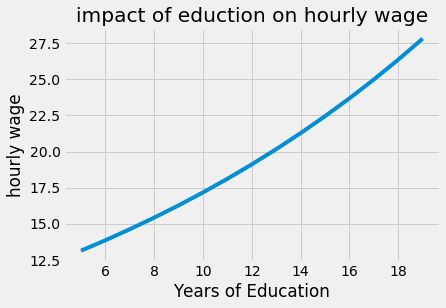

In [20]:
#画出回归曲线
style.use("fivethirtyeight")
x=np.array(range(5,20))
plt.plot(x, np.exp(model_1.params['Intercept']+model_1.params['educ']*x))
plt.xlabel("Years of Education")
plt.ylabel("hourly wage")
plt.title("impact of eduction on hourly wage")
plt.show()

In [21]:
#model2: 加一些控制变量
control=["IQ","exper","tenure","age","married","black","south","urban","sibs","brthord","meduc","feduc"]
model_2=smf.ols('lhwage~educ+'+'+'.join(control),data=wage).fit()
print(model_2.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1156      0.232      4.802      0.000       0.659       1.572
educ           0.0411      0.010      4.075      0.000       0.021       0.061
IQ             0.0038      0.001      2.794      0.005       0.001       0.006
exper          0.0153      0.005      3.032      0.003       0.005       0.025
tenure         0.0094      0.003      2.836      0.005       0.003       0.016
age            0.0086      0.006      1.364      0.173      -0.004       0.021
married        0.1795      0.053      3.415      0.001       0.076       0.283
black         -0.0801      0.063     -1.263      0.207      -0.205       0.044
south         -0.0397      0.035     -1.129      0.259      -0.109       0.029
urban          0.1926      0.036      5.418      0.000       0.123       0.262
sibs           0.0065      0.009      0.722      0.4